In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers,datasets
from tensorflow.keras.models import Sequential
import sklearn.datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
Breast_cancer_datset=sklearn.datasets.load_breast_cancer()
Breast_cancer_datset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
dir(Breast_cancer_datset)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
y=Breast_cancer_datset.target

In [5]:
X=pd.DataFrame(Breast_cancer_datset.data)

In [6]:
X.shape

(569, 30)

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
(X_train.shape,X_test.shape),(y_train.shape,y_test.shape)

(((455, 30), (114, 30)), ((455,), (114,)))

In [8]:
#Scaling the data 
MMS=MinMaxScaler()
X_train_scaled=MMS.fit_transform(X_train)
X_test_scaled=MMS.transform(X_test)

In [19]:
#Now creating a Artifical neural Network for the dataset 
Model=keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2,activation='sigmoid')
])

Model.compile(
    metrics=['accuracy'], optimizer='adam', loss='sparse_categorical_crossentropy'
)

history = Model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6783 - loss: 0.6578 - val_accuracy: 0.6739 - val_loss: 0.6542
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6811 - loss: 0.6208 - val_accuracy: 0.7391 - val_loss: 0.6298
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7330 - loss: 0.6171 - val_accuracy: 0.7609 - val_loss: 0.6089
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7726 - loss: 0.5857 - val_accuracy: 0.7826 - val_loss: 0.5883
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7417 - loss: 0.5707 - val_accuracy: 0.8261 - val_loss: 0.5596
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7442 - loss: 0.5563 - val_accuracy: 0.8261 - val_loss: 0.5394
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7694 - loss: 0.5532 - val_accuracy: 0.8261 - val_loss: 0.5207
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8291 - loss: 0.4898 - val_accuracy: 0.8478 - val_loss: 0.4998
Ep

In [20]:
Model.evaluate(X_train_scaled,y_train)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8777 - loss: 0.4271 


[0.4338127672672272, 0.8791208863258362]

In [21]:
Model.evaluate(X_test_scaled,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9101 - loss: 0.4362 


[0.43102705478668213, 0.9210526347160339]

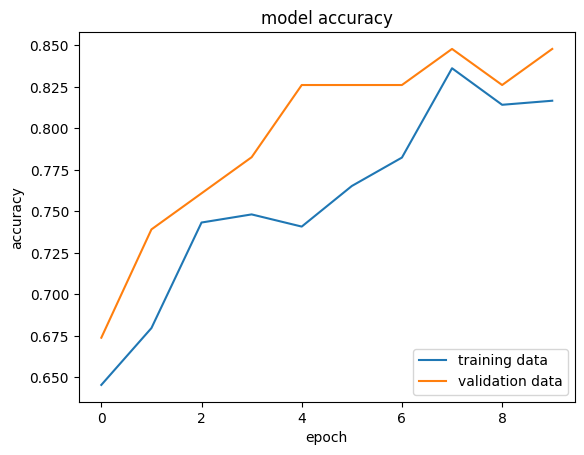

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

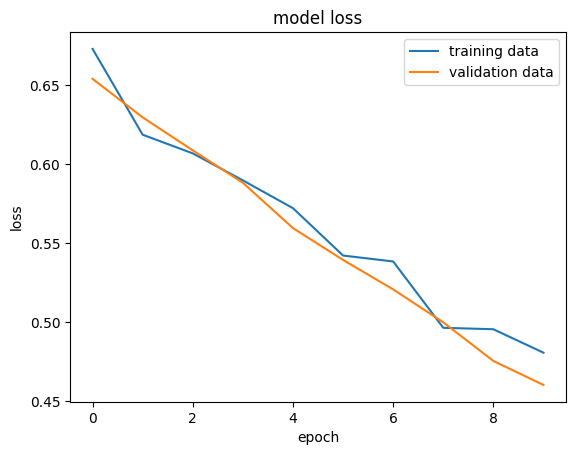

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [12]:
y_pred=Model.predict(X_test_scaled)
y_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([[0.5586351 , 0.24782315],
       [0.41245282, 0.5852659 ],
       [0.40983203, 0.49773002],
       [0.45390943, 0.44715396],
       [0.5431236 , 0.22361869],
       [0.47497657, 0.4700992 ],
       [0.4265538 , 0.619257  ],
       [0.53981435, 0.3147902 ],
       [0.47557464, 0.34111857],
       [0.5793564 , 0.22964835],
       [0.40890118, 0.56658137],
       [0.4652627 , 0.40446684],
       [0.43996903, 0.5332141 ],
       [0.47645628, 0.36936024],
       [0.42868596, 0.40647376],
       [0.43005013, 0.4617167 ],
       [0.5005691 , 0.4482548 ],
       [0.37205544, 0.58635193],
       [0.44685203, 0.52250713],
       [0.43854278, 0.54659456],
       [0.47672176, 0.40910265],
       [0.45208943, 0.39885092],
       [0.39348832, 0.60854876],
       [0.51258147, 0.6025968 ],
       [0.40151706, 0.5798718 ],
       [0.45736942, 0.45722288],
       [0.52164376, 0.22196999],
       [0.41277984, 0.58188534],
       [0.41268802, 0.58805823],
       [0.36276492, 0.58455646],
       [0.

In [15]:
y_predicted=[np.argmax(i) for i in y_pred]
y_predicted[:7]

[0, 1, 1, 0, 0, 0, 1]

In [14]:
y_test[:7]

array([0, 1, 0, 1, 0, 1, 1])

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        48
           1       0.85      0.92      0.88        66

    accuracy                           0.86       114
   macro avg       0.86      0.85      0.85       114
weighted avg       0.86      0.86      0.86       114



In [17]:
cm=confusion_matrix(y_test,y_predicted,labels=[0,1])

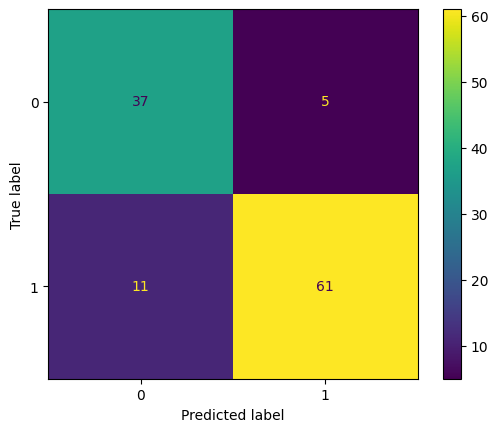

In [18]:
graph=ConfusionMatrixDisplay(cm,display_labels=[0,1])
graph.plot()

In [24]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = MMS.transform(input_data_reshaped)

prediction = Model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[[0.41029087 0.6206885 ]]
[1]
The tumor is Benign


In [28]:
input_data_as_numpy_array.reshape(1,-1).shape

(1, 30)